# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

* ¿Cuántas imagenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(len(test_labels))
print(pd.DataFrame(test_labels).value_counts())

10000
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64


In [ ]:
print("Min:", np.min(train_images))
print("Max:", np.max(train_images))

Min: 0
Max: 255


Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [ ]:
X_train = train_images / 255
X_test = test_images / 255

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

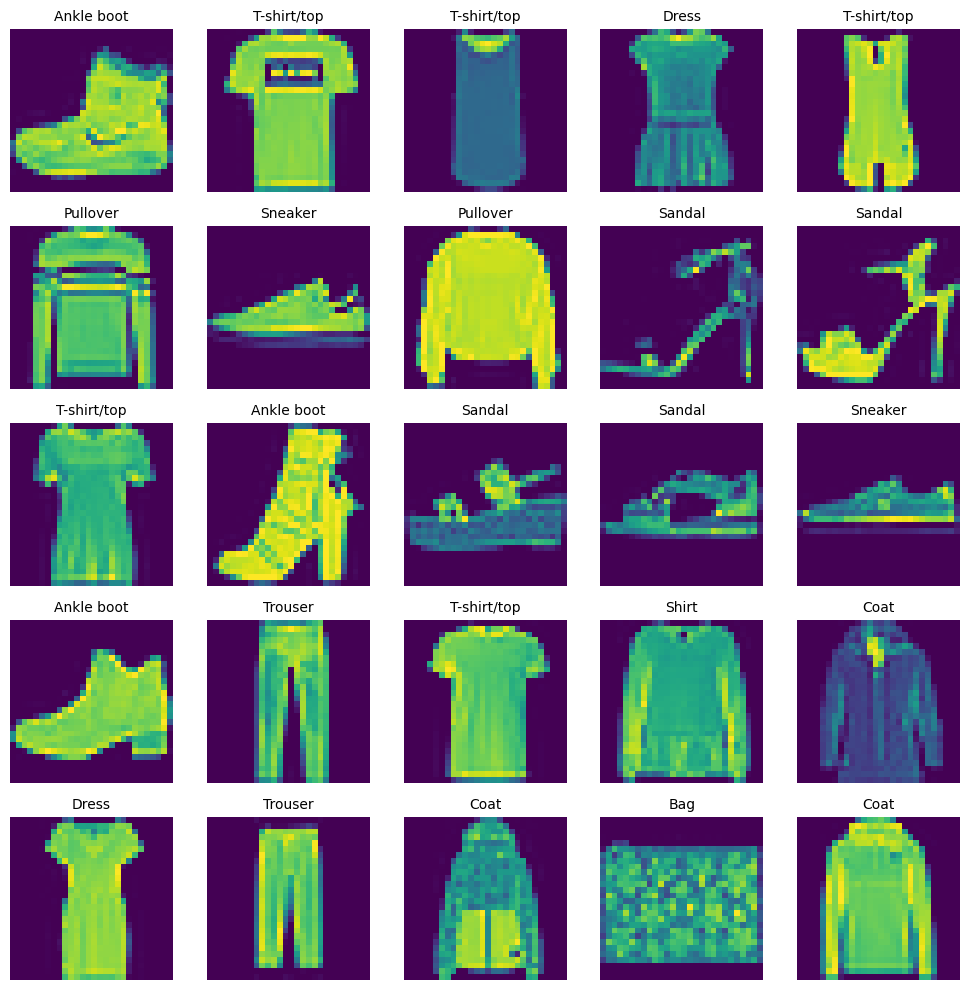

In [ ]:
# Definir el número de filas y columnas para mostrar las imágenes
num_filas = 5
num_columnas = 5

# Crear una figura y ejes para mostrar las imágenes
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(10, 10))

# Iterar sobre las primeras 25 imágenes del conjunto de entrenamiento
for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j  # Calcular el índice de la imagen
        axs[i, j].imshow(X_train[index])  # Mostrar la imagen
        axs[i, j].set_title(class_names[train_labels[index]], fontsize=10)  # Establecer el título como el nombre de la clase
        axs[i, j].axis('off')  # Desactivar los ejes
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()



## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [ ]:
layers = [keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')    
]

layers_2 = [keras.layers.Conv2D(64, (4,4), activation='relu', input_shape=(28,28,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (4,4), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='softmax')]

In [ ]:
model = keras.Sequential(layers)

In [ ]:
model2 = keras.Sequential(layers_2)

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.

Prueba en el posterior entrenamiento varios optimizadores.

Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [ ]:
model2.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [19]:
history = model.fit(X_train, train_labels, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10


1500/1500 [==============================] - 6s 4ms/step - loss: 0.4986 - accuracy: 0.8231 - val_loss: 0.4376 - val_accuracy: 0.8364
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3678 - accuracy: 0.8648 - val_loss: 0.3859 - val_accuracy: 0.8613
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3353 - accuracy: 0.8758 - val_loss: 0.3473 - val_accuracy: 0.8736
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3071 - accuracy: 0.8859 - val_loss: 0.3573 - val_accuracy: 0.8714
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2905 - accuracy: 0.8913 - val_loss: 0.3371 - val_accuracy: 0.8769
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2723 - accuracy: 0.8973 - val_loss: 0.3203 - val_accuracy: 0.8881
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2592 - accuracy: 0.9026 - val_loss: 0.3344 - val_accurac

In [20]:
# history2 = model2.fit(X_train, train_labels, epochs=10, validation_split=0.2, verbose=1)

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [21]:
results = model.evaluate(X_test, test_labels, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3704 - accuracy: 0.8787


## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [22]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [51]:
predictions


array([[2.93776448e-09, 2.11169463e-05, 3.61735687e-07, ...,
        8.83639697e-03, 7.33501793e-08, 9.90510046e-01],
       [8.91616946e-06, 1.68281743e-13, 9.97187316e-01, ...,
        3.16939188e-16, 8.19015689e-10, 9.44103558e-16],
       [6.01400440e-14, 1.00000000e+00, 1.07816005e-16, ...,
        1.97778298e-30, 1.96672013e-18, 3.31157768e-25],
       ...,
       [2.18802398e-07, 6.25146704e-14, 1.89928571e-08, ...,
        3.41470255e-12, 9.99998569e-01, 2.72311299e-16],
       [1.16187171e-12, 9.99994755e-01, 1.42599460e-13, ...,
        1.68086189e-19, 3.29202746e-12, 1.83356714e-14],
       [5.86948181e-06, 2.11139451e-07, 2.24980922e-05, ...,
        1.53194327e-04, 1.63475070e-05, 1.00247155e-06]], dtype=float32)

In [24]:
predictions[0]

array([2.9377645e-09, 2.1116946e-05, 3.6173569e-07, 1.8009322e-07,
       7.7742200e-08, 6.3137093e-04, 3.6466741e-07, 8.8363970e-03,
       7.3350179e-08, 9.9051005e-01], dtype=float32)

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [25]:
test_labels[0]

9

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [26]:
predictions[0].max()

0.99051005

In [27]:
class_names[9]

'Ankle boot'

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

In [34]:
import seaborn as sns   

In [44]:
predicciones_0 = pd.DataFrame(predictions[0])
predicciones_0

,0
0,2.937764e-09
1,2.111695e-05
2,3.617357e-07
3,1.800932e-07
4,7.774220e-08
5,6.313709e-04
6,3.646674e-07
7,8.836397e-03
8,7.335018e-08
9,9.905100e-01


Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

In [48]:
trainlabels = pd.DataFrame(train_labels)

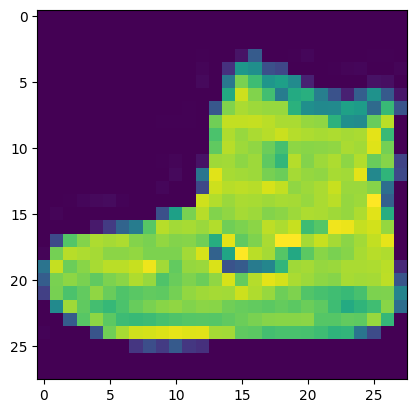

In [46]:
plt.imshow(train_images[0])

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

In [ ]:
grafico que muestre las etiquetas para cada imagen y su prediccion 

In [54]:
# Inicializar listas para almacenar los máximos y sus índices
maximos = []
indices_maximos = []

# Encontrar el máximo y su índice para cada sublista
for sublista in predictions:
    maximo_sublista = np.max(sublista)
    indice_maximo_sublista = np.argmax(sublista)
    maximos.append(maximo_sublista)
    indices_maximos.append(indice_maximo_sublista)

# Imprimir los máximos y sus índices
print("Máximos:", maximos)
print("Índices de máximos:", indices_maximos)

Máximos: [0.99051005, 0.9971873, 1.0, 1.0, 0.55870163, 1.0, 0.9989034, 0.9946473, 1.0, 0.9999323, 0.96678615, 0.9999918, 0.5463784, 0.99667525, 0.67966074, 0.99999774, 0.9993537, 0.9753685, 0.9999968, 0.9978283, 0.9983815, 0.90022045, 0.9999778, 0.944003, 1.0, 0.75479716, 0.6554248, 0.7253271, 0.9294796, 0.48486876, 1.0, 0.9999999, 0.86528665, 0.87613654, 1.0, 0.99832565, 0.99999344, 0.99999976, 0.99998724, 0.9998901, 0.9736615, 1.0, 0.52447593, 0.5515367, 0.893325, 0.9402528, 0.99293774, 0.9999776, 0.815464, 0.48514342, 0.91237605, 0.85381997, 0.9999988, 0.99844724, 0.96049833, 0.9948835, 1.0, 0.8991544, 0.99999976, 0.9992853, 0.9993754, 0.99880505, 1.0, 0.9999958, 1.0, 0.9999988, 0.30135056, 0.79172975, 0.9916705, 1.0, 0.99414575, 0.73344994, 0.88983244, 0.50255215, 0.5532416, 0.9529283, 1.0, 0.9980008, 1.0, 0.99560636, 0.99969566, 1.0, 1.0, 0.9999639, 1.0, 0.9998442, 0.92863584, 0.9987696, 0.9997633, 0.9275021, 0.99999976, 0.87701315, 0.95186377, 0.9999918, 1.0, 0.9999993, 0.9316453

In [58]:
df_resultado = pd.DataFrame({'Maximo': maximos, 'Indice_Maximo': indices_maximos})
df_resultado = df_resultado.rename(columns={'Indice_Maximo': 'Predicciones_Modelo'})
df_resultado

,Maximo,Predicciones_Modelo
0,0.990510,9
1,0.997187,2
2,1.000000,1
3,1.000000,1
4,0.558702,6
...,...,...
9995,0.999971,9
9996,0.999995,1
9997,0.999999,8
9998,0.999995,1


In [63]:
df_resultado= pd.concat([pd.DataFrame(test_labels), df_resultado], axis=1)

In [70]:
df_resultado = df_resultado.rename(columns={0: 'Labels'})

In [71]:
df_resultado

,Labels,Maximo,Predicciones_Modelo
0,9,0.990510,9
1,2,0.997187,2
2,1,1.000000,1
3,1,1.000000,1
4,6,0.558702,6
...,...,...,...
9995,9,0.999971,9
9996,1,0.999995,1
9997,8,0.999999,8
9998,1,0.999995,1


c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: >

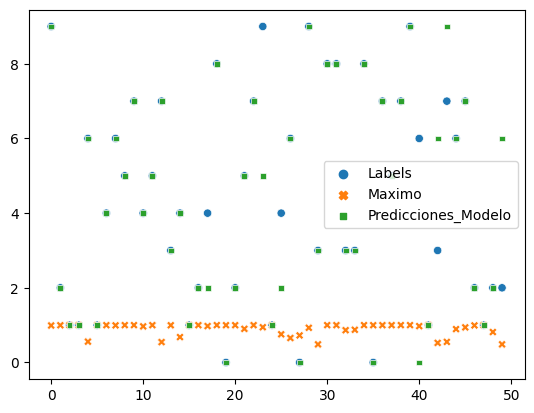

In [75]:
sns.scatterplot(df_resultado[:50])

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.